### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Displaying all the columns so it will show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load Dataset
df = pd.read_excel('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/Supermarket-December-2017.xlsx')
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
72312,IN,JUL,NaN,7.0,K,A,AREA,NaN,SABUNCP,613.0,SUNLIGHT RF 400ML LEMON,NaN,NaN,2017-01-15,070115302,NaN,CD,NaN,NaN,1.0,8300.0,NaN,7455.62,8300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8300.00,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701157e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,TIKA,2017-01-15,19:02:52,NaN
17222,IN,JUL,NaN,3.0,K,A,AREA,NaN,SUSU KT,25865.0,PRENAGEN MOMMY 200GR COKLAT KT,NaN,NaN,2017-01-03,030103259,NaN,CD,NaN,NaN,1.0,38400.0,NaN,37255.83,38400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,38400.00,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701038e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,ANNISA,2017-01-03,20:36:15,NaN
115800,IN,JUL,NaN,4.0,K,A,AREA,NaN,SABUNKS,1609.0,RESIK-V 90ML KHASIAT MANJAKANI,NaN,NaN,2017-01-26,040126032,NaN,CD,NaN,NaN,1.0,16300.0,NaN,14629.32,16300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,16300.00,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701268e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,TRI,2017-01-26,10:07:57,NaN
141271,IN,JUL,NaN,3.0,K,A,AREA,NaN,CANGKIR,41419.0,CANGKIR 7119 [NSP],NaN,NaN,2017-01-31,030131029,NaN,CD,NaN,NaN,1.0,6200.0,NaN,4037.50,6200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6200.00,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701315e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,TRI,2017-01-31,09:49:12,NaN
65533,IN,JUL,30.0,7.0,K,A,AREA,NaN,SUSU KL,41742.0,S 26 PROCAL GOLD 900GR,NaN,NaN,2017-01-14,070114148,NaN,CM,NaN,NaN,2.0,236800.0,NaN,232597.50,236800.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,485743.59,C.CRD MANDIRI,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701141e+11,NaN,NaN,NaN,NaN,*,NaN,S,WARE,2017-01-14,14:36:45,NaN


In [28]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [29]:
# Check if null
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


In [30]:
# Understanding the data
df['TP_TRN'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
TP_TRN,
JUL,136241
TRM,9350
ADJ,1217
REB,1165
MTS,460
REJ,53


Setelah mempertimbangkan dan memahami dataset, saya hanya akan mengumpulkan beberapa kolom yang diperlukan untuk Market Basket Analysis. Kolom-kolom tersebut adalah:
- TP_TRN: Tipe transaksi (agar dapat membedakan transaksi yang diambil hanya transaksi penjualan, bukan pembelian/retur)
- KEL: Kelompok barang, atau jenis barang sehingga dapat dignakan untuk analisis penempatan barang.
- NO_BKT: Nomor Transaksi, digunakan untuk mengetahui barang yang dibeli bersamaan
- QTY: Kuantitas, Untuk mengetahui kuantitas pembelian dan memahami volume barang yang sering dibeli.
- TGL_TRANS & JAM: Tanggal dan jam transaksi, Untuk analisis waktu pembelian.

In [31]:
df_new = df[['TP_TRN', 'KEL','NAMA', 'NO_BKT', 'QTY', 'TGL_TRANS', 'JAM']]
df_new.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TP_TRN,KEL,NAMA,NO_BKT,QTY,TGL_TRANS,JAM
63557,JUL,SUSU KT,MILO 3IN1 ACTIV-GO 1KG,030113257,1.0,2017-01-13,21:26:24
136423,TRM,ROTI.B,LORENA SISIR PANDAN,0870/0117,2.0,2017-01-30,13:41:57
101708,JUL,BISCPAK,KOKOLA HAI CKACKER 100G CHEESE,070122286,1.0,2017-01-22,19:20:37
63135,JUL,PAMPERS,SWEETY BRONZE PANTS M-20+2,040113171,1.0,2017-01-13,20:25:36
11053,JUL,CAMPINA,CAMPINA TROPICANA,070102294,1.0,2017-01-02,19:25:46


In [32]:
# Membuang semua row yang bukan penjualan
df_new = df_new[df_new['TP_TRN'] == 'JUL']
df_new.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TP_TRN,KEL,NAMA,NO_BKT,QTY,TGL_TRANS,JAM
6608,JUL,P GIGI,PEPSODENT 120GR WHIT,060101092,1.0,2017-01-01,19:12:41
80279,JUL,MIE,MIE SUKSES AYAM BAWANG 112GR,070117237,1.0,2017-01-17,18:10:32
53403,JUL,SAUS,ABC SAUS TOMAT 335ML,030111082,1.0,2017-01-11,13:15:48
2914,JUL,INSECTA,HIT NON STOP RF GREE,010101155,1.0,2017-01-01,20:19:28
88493,JUL,B DAPUR,MASAKO RS AYAM 6X11GR,030119132,1.0,2017-01-19,16:45:18


In [33]:
df_new.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
TP_TRN,0
KEL,0
NAMA,0
NO_BKT,0
QTY,0
TGL_TRANS,0
JAM,0


In [34]:
df_new.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 136241 entries, 0 to 148488
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TP_TRN     136241 non-null  object        
 1   KEL        136241 non-null  object        
 2   NAMA       136241 non-null  object        
 3   NO_BKT     136241 non-null  object        
 4   QTY        136241 non-null  float64       
 5   TGL_TRANS  136241 non-null  datetime64[ns]
 6   JAM        136241 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([17167., 17171., 17175., 17179., 17183., 17187., 17191., 17195.,
        17198.]),
 [Text(17167.0, 0, '2017-01-01'),
  Text(17171.0, 0, '2017-01-05'),
  Text(17175.0, 0, '2017-01-09'),
  Text(17179.0, 0, '2017-01-13'),
  Text(17183.0, 0, '2017-01-17'),
  Text(17187.0, 0, '2017-01-21'),
  Text(17191.0, 0, '2017-01-25'),
  Text(17195.0, 0, '2017-01-29'),
  Text(17198.0, 0, '2017-02-01')])

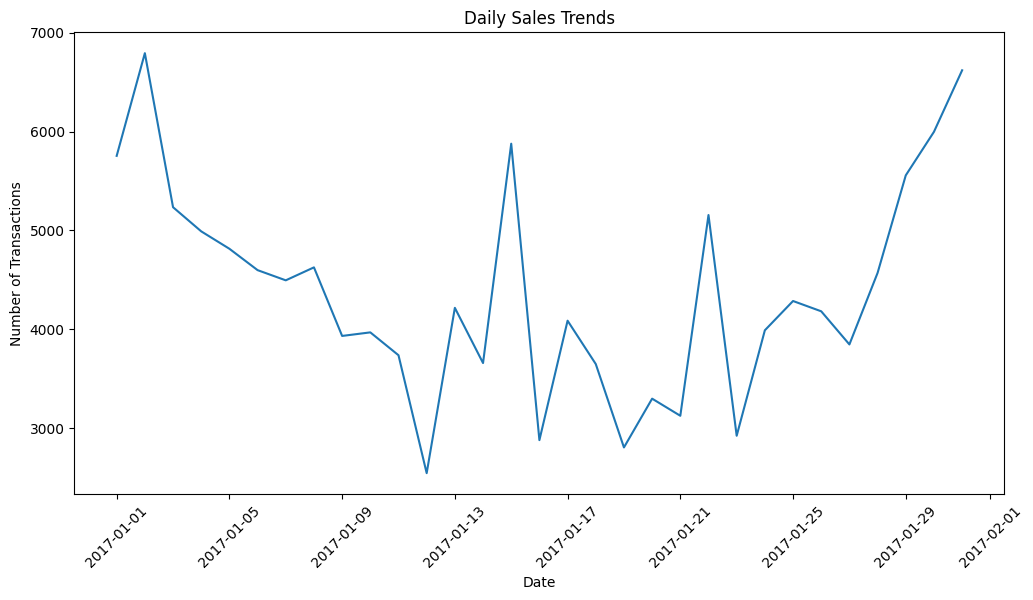

In [35]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
df_new['date'] = df_new['TGL_TRANS'].dt.date

daily = df_new.groupby('date').size().reset_index(name='count')

plt.plot(daily['date'], daily['count'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trends')
plt.xticks(rotation=45)

Visualisasi menunjukkan bahwa penjualan mengalami lonjakan yang signifikan di awal bulan Januari, yang kemungkinan besar dipicu oleh kegiatan belanja Tahun Baru. Setelah lonjakan tersebut, penjualan menunjukkan penurunan bertahap selama dua minggu pertama bulan tersebut, dengan penurunan yang cukup signifikan antara tanggal 9 hingga 13 Januari. Pada pertengahan Januari, terjadi fluktuasi yang tajam dalam volume transaksi, dengan puncak-puncak yang cukup mencolok pada tanggal 17 dan 21 Januari. Namun, menjelang akhir bulan, volume transaksi mulai meningkat secara stabil, dengan tren kenaikan yang jelas hingga mencapai puncaknya pada tanggal 30 dan 31 Januari. Fluktuasi ini memberikan gambaran tentang bagaimana pola belanja dapat dipengaruhi oleh berbagai faktor, seperti liburan, promosi, dan pola konsumsi musiman.

In [36]:
df_new['JAM'] = pd.to_datetime(df_new['JAM'])

df_new['month'] = df_new['TGL_TRANS'].dt.month
df_new['day'] = df_new['TGL_TRANS'].dt.day
df_new['day-name'] = df_new['TGL_TRANS'].dt.day_name()
df_new['hour'] = df_new['JAM'].dt.hour
df_new.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-df5ec3ca3bbb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['JAM'] = pd.to_datetime(df_new['JAM'])


,TP_TRN,KEL,NAMA,NO_BKT,QTY,TGL_TRANS,JAM,date,month,day,day-name,hour
0,JUL,KERTAS,KERTAS KADO SINAR DU,060102001,2.0,2017-01-02,2024-12-12 08:12:02,2017-01-02,1,2,Monday,8
1,JUL,BTL/DOT,PIGEON BTL PP RP 240,060102002,1.0,2017-01-02,2024-12-12 08:24:51,2017-01-02,1,2,Monday,8
2,JUL,MUSTIKA,MR SEKAR TANJUNG KB,060102003,1.0,2017-01-02,2024-12-12 08:28:18,2017-01-02,1,2,Monday,8
3,JUL,SABUN.C,BIORE BF 100ML WHITE,060102003,1.0,2017-01-02,2024-12-12 08:28:22,2017-01-02,1,2,Monday,8
4,JUL,LULURMD,OVALE LULUR BALI BEN,060102003,1.0,2017-01-02,2024-12-12 08:28:20,2017-01-02,1,2,Monday,8


In [37]:
# Memahami Peak Hour
df_new['day-name'] = pd.Categorical(df_new['day-name'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
aggregated = df_new.groupby(['hour', 'day-name']).size().unstack(fill_value=0)
aggregated['Total per Hour'] = aggregated.sum(axis=1)
aggregated

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-fd1befaf3389>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated = df_new.groupby(['hour', 'day-name']).size().unstack(fill_value=0)


day-name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Total per Hour
hour,,,,,,,,
8,458,495,311,453,459,317,641,3134
9,1404,1396,907,894,1064,1065,1646,8376
10,1792,1687,1280,1237,1110,1352,2506,10964
11,1727,1483,1328,1260,1040,1034,2241,10113
12,1276,1169,814,731,745,902,1853,7490
13,1248,993,814,680,883,919,1731,7268
14,1435,1089,707,692,688,996,1604,7211
15,1283,1152,865,544,1094,864,1176,6978
16,1339,1613,1169,598,1156,1229,1376,8480


Tabel menunjukkan distribusi jumlah transaksi per jam untuk setiap hari dalam seminggu, dengan kolom terakhir, **Total per Hour**, yang menjumlahkan total transaksi untuk masing-masing jam di seluruh hari. Dari data ini, terlihat bahwa puncak transaksi terjadi pada jam-jam tertentu, khususnya pada sore hingga malam hari, seperti jam 19.00 dengan total 17.438 transaksi, yang merupakan jam dengan transaksi tertinggi dalam seminggu. Aktivitas mulai meningkat signifikan dari pagi hari sekitar jam 9.00 (8.376 transaksi) dan terus memuncak hingga malam. Hari Minggu secara konsisten memiliki transaksi tertinggi dalam berbagai jam, menunjukkan bahwa pelanggan lebih aktif berbelanja pada hari libur. Data ini memberikan wawasan penting untuk mengatur sumber daya seperti staf atau promosi pada jam dan hari puncak.

In [38]:
aggregated = aggregated.drop(columns=['Total per Hour'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


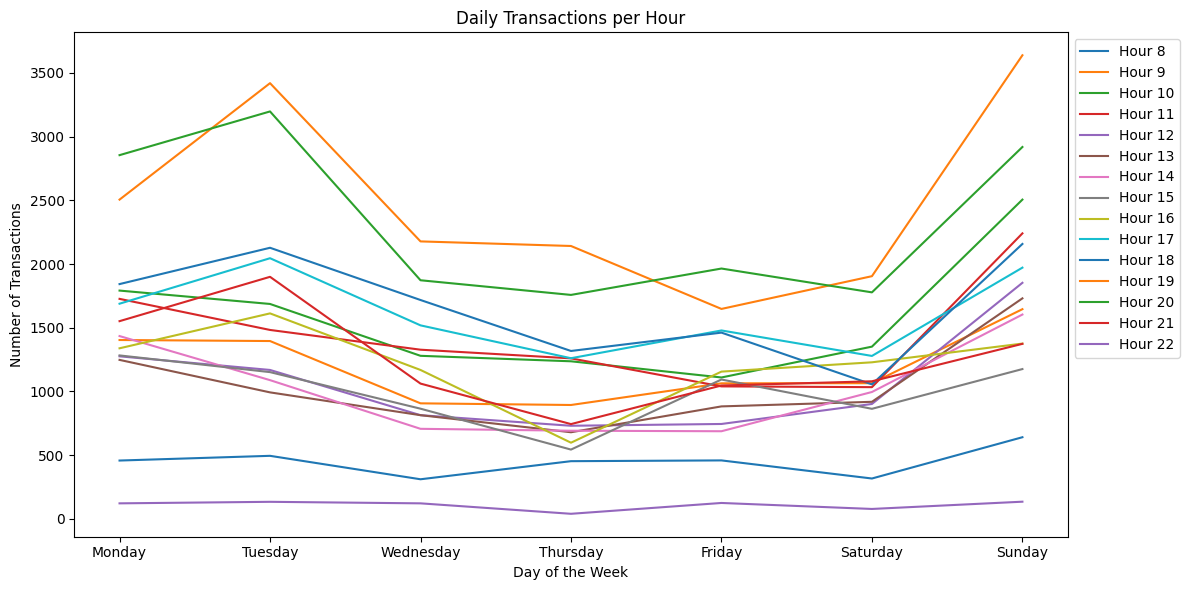

In [39]:

plt.figure(figsize=(12, 6))

for hour in aggregated.index:
    hour_data = aggregated.loc[hour]
    plt.plot(hour_data.index, hour_data.values, label=f'Hour {hour}')

plt.title('Daily Transactions per Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


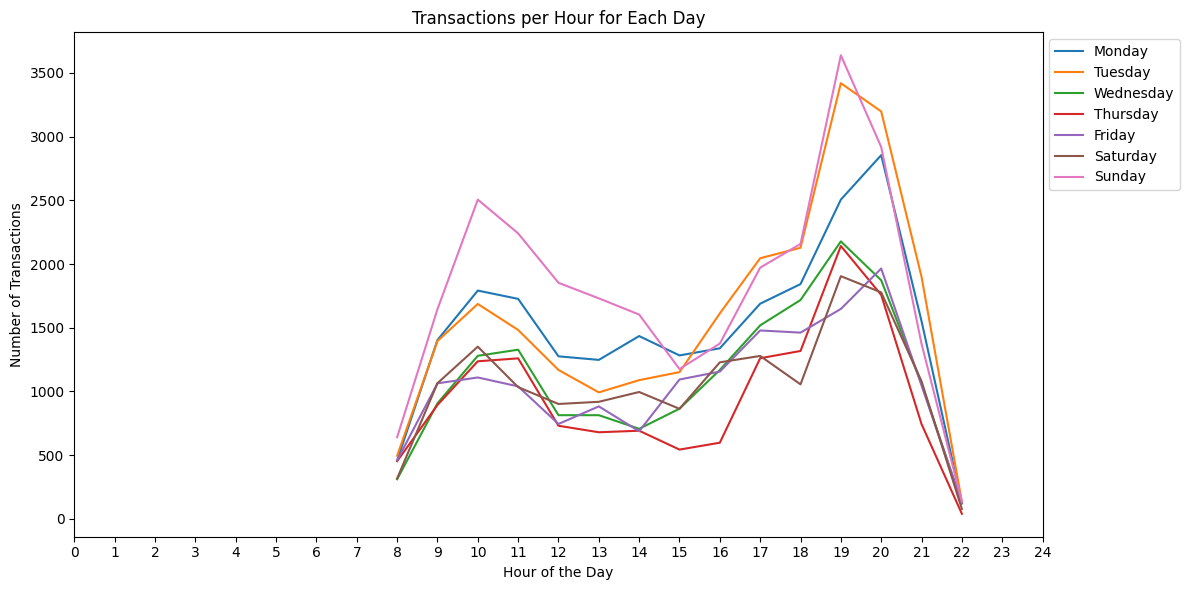

In [40]:

plt.figure(figsize=(12, 6))

# Plot setiap hari
for day in aggregated.columns:
    day_data = aggregated[day]
    plt.plot(aggregated.index, day_data.values, label=day)

# Menentukan rentang jam (0 hingga 24) pada sumbu x
plt.xticks(ticks=np.arange(0, 25, 1))  # Set ticks dari 0 hingga 24 dengan interval 1

# Menambahkan judul, label, dan legenda
plt.title('Transactions per Hour for Each Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Pindahkan legenda ke luar plot
plt.tight_layout()  # Atur tata letak agar tidak saling bertumpuk
plt.show()



Visualisasi ini menunjukkan bahwa ada kenaikan yang signifikan di jam-jam tertentu seperti jam 7 malam dan juga 10 pagi. Transaksi terjadi paling tinggi diantara jam 6-8 malam menunjukkan bahwa orang-orang berbelanja setelah pulang bekerja atau pada hari libur.

### **Item Popularity**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


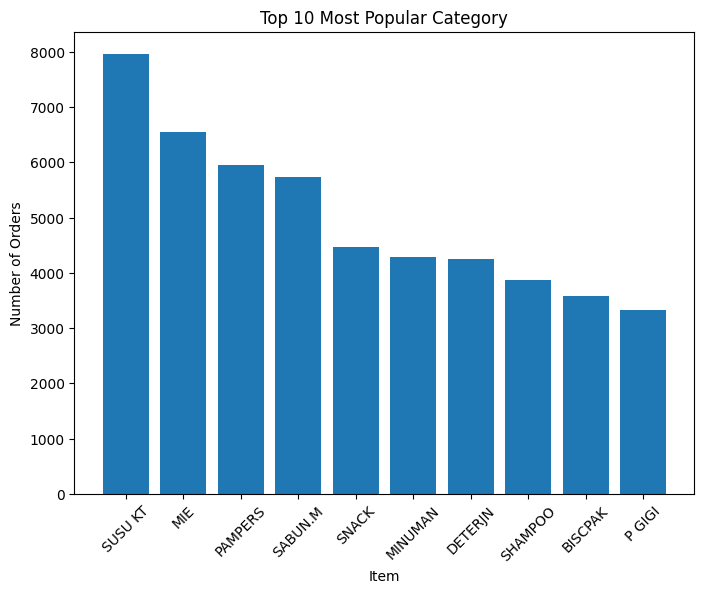

In [41]:
plt.figure(figsize=(8, 6))
item_counts = df_new['KEL'].value_counts().head(10)
plt.bar(item_counts.index, item_counts.values)
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Category')
plt.xticks(rotation=45)
plt.show()

Grafik ini menunjukkan 10 item paling populer berdasarkan jumlah pesanan. Sumbu vertikal mewakili jumlah pesanan, sementara sumbu horizontal mencantumkan nama-nama item. Item dengan jumlah pesanan tertinggi adalah "SUSU KT" yang mendekati 8000 pesanan, diikuti oleh "MIE" dan "PAMPERS" dengan sekitar 7000 dan 6500 pesanan. Item lainnya seperti "SABUN M", "SNACK", "MINUMAN", "DETERJEN", "SHAMPOO", "BISCPAK", dan "P GIGI" memiliki jumlah pesanan yang lebih rendah, berkisar antara 4000 hingga 5000. Grafik ini memberikan informasi penting tentang preferensi konsumen terhadap berbagai produk, yang dapat digunakan untuk analisis pasar dan pengambilan keputusan bisnis.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


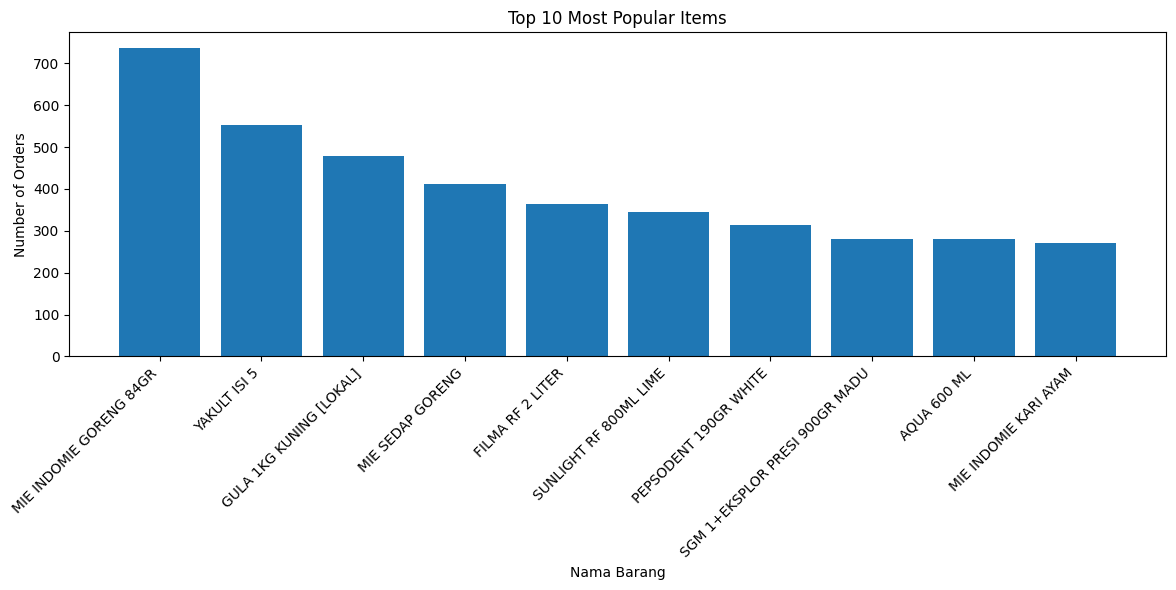

In [42]:
plt.figure(figsize=(12, 6))
item_counts = df_new['NAMA'].value_counts().head(10)
plt.bar(item_counts.index, item_counts.values)
plt.xlabel('Nama Barang')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik ini menunjukkan 10 item paling populer berdasarkan jumlah pesanan. Sumbu vertikal mewakili jumlah pesanan, sementara sumbu horizontal mencantumkan nama-nama item. Item dengan jumlah pesanan tertinggi adalah "MIE INDOMIE GORENG 84GR", diikuti oleh "YAKULT ISI 5" dan "GULA 1KG KUNING (LOKAL)". Item-item lain seperti "MIE SEDAP GORENG", "FILMA RF 2 LITER", "SUNLIGHT RF 800ML LIME", "PEPSODENT 190GR WHITE", "SGM 1+EKSPLOR PRESI 900GR MADU", "AQUA 600 ML", dan "MIE INDOMIE KARI AYAM" memiliki jumlah pesanan yang lebih rendah.

### **Apriori Algorithm**

In [43]:
transactions = df_new.groupby(['NO_BKT', 'KEL']).size().unstack(fill_value=0)

# Mengubah nilai menjadi 1 jika item tersebut ada dalam transaksi, 0 jika tidak ada
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)

# Melihat hasilnya
transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-a1204ce6e890>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [44]:
frequencies = apriori(transactions, min_support=0.02, use_colnames=True)
frequencies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.038564,(AIR.M)
1,0.032849,(ASESORS)
2,0.033556,(B DAPUR)
3,0.063943,(BISCPAK)
4,0.024247,(BTL/DOT)
5,0.032735,(COKLAT)
6,0.027077,(DDORANT)
7,0.085389,(DETERJN)
8,0.029057,(GULA)
9,0.021305,(HBL)


In [45]:
result = association_rules(frequencies, metric="lift", min_threshold=1)

result.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(MIE),(DETERJN),0.080353,0.085389,0.023908,0.297535,3.484455,0.017047,1.302002,0.775310
0,(SNACK),(BISCPAK),0.068979,0.063943,0.022125,0.320755,5.016263,0.017715,1.378084,0.859968
4,(SOFTENR),(DETERJN),0.043685,0.085389,0.028293,0.647668,7.584888,0.024563,2.595880,0.907817
16,(PAMPERS),(SHAMPOO),0.142287,0.083663,0.021644,0.152118,1.818211,0.009740,1.080736,0.524661
14,(PAMPERS),(SABUN.M),0.142287,0.089548,0.023682,0.166435,1.858599,0.010940,1.092238,0.538596
15,(SABUN.M),(PAMPERS),0.089548,0.142287,0.023682,0.264455,1.858599,0.010940,1.166091,0.507397
24,(P GIGI),"(SABUN.M, SHAMPOO)",0.077580,0.040375,0.024672,0.318016,7.876636,0.021540,1.407108,0.946470
19,(SHAMPOO),(SABUN.M),0.083663,0.089548,0.040375,0.482584,5.389080,0.032883,1.759611,0.888800
25,(SHAMPOO),"(SABUN.M, P GIGI)",0.083663,0.041818,0.024672,0.294893,7.051905,0.021173,1.358919,0.936549
23,(SABUN.M),"(SHAMPOO, P GIGI)",0.089548,0.038677,0.024672,0.275513,7.123443,0.021208,1.326902,0.944167


Tabel ini menunjukkan hasil analisis asosiasi menggunakan algoritma Apriori, yang mengidentifikasi pola pembelian produk yang sering terjadi bersama di pasar. Kolom-kolom seperti **antecedents** dan **consequents** mengindikasikan produk yang dibeli bersama, sementara **support**, **confidence**, dan **lift** menunjukkan seberapa kuat hubungan tersebut, dengan nilai yang lebih tinggi menunjukkan hubungan yang lebih kuat antar produk. Misalnya, jika seseorang membeli "SNACK", mereka lebih cenderung membeli "BISCPAK" juga, dengan **confidence** tinggi dan **lift** yang signifikan. Implikasi dari analisis ini adalah bahwa produk yang sering dibeli bersamaan dapat dikelompokkan atau dipromosikan bersama, misalnya dengan strategi bundling atau penempatan barang yang lebih berdekatan di toko. Untuk memanfaatkan temuan ini, sebaiknya toko menata ulang rak mereka, menyarankan pembelian paket produk yang sering dibeli bersama, dan merancang promosi silang untuk meningkatkan penjualan dan pengalaman belanja pelanggan.

## **Conclusion**




1. **Sales di Bulan Januari:**
   Penjualan mengalami lonjakan awal di awal bulan, kemungkinan dipicu oleh belanja Tahun Baru. Kemudian terjadi penurunan bertahap selama dua minggu pertama, dengan penurunan signifikan antara 9-13 Januari. Pertengahan Januari menunjukkan fluktuasi tajam, dengan puncak yang signifikan pada 17 dan 21 Januari. Menjelang akhir bulan, volume transaksi meningkat secara stabil, mencapai puncaknya sekitar 30-31 Januari.

2. **Transaksi Harian per Jam:**
   Berdasarkan analisis transaksi harian per jam, terlihat adanya puncak transaksi pada jam-jam tertentu, terutama di pagi dan sore hari. Jam 9 hingga 11 pagi dan sekitar jam 6-8 malam cenderung memiliki volume transaksi yang lebih tinggi. Ini menunjukkan bahwa periode-periode ini adalah waktu yang tepat untuk menargetkan promosi dan meningkatkan stok barang.

3. **Transaksi per Jam untuk Setiap Hari:**
   Setiap hari dalam minggu memiliki pola transaksi yang sedikit berbeda, dengan puncak transaksi di hari-hari tertentu seperti hari Minggu. Hal ini memberikan insight bahwa hari-hari tertentu bisa menjadi waktu yang lebih baik untuk melakukan promosi atau penempatan produk tertentu agar menarik lebih banyak pelanggan.

4. **Top 10 Kategori:**
   Kategori produk dengan penjualan tertinggi seperti SUSU, MIE, PAMPERS, SABUN MANDI, SNACK, MINUMAN, DETERJEN, SHAMPOO, BISCPAK, PASTA GIGI menunjukkan area fokus yang harus dipertahankan atau ditingkatkan. Produk-produk dalam kategori ini harus lebih dipromosikan dan ditempatkan di tempat yang lebih strategis dalam toko untuk meningkatkan aksesibilitas dan mempercepat penjualan.

5. **Top 10 Item:**
   Daftar top 10 item dengan jumlah penjualan tertinggi seperti INDOMIE GORENG, YAKULT, GULA, MIE SEDAP GORENG, FILMA, SUNLIGHT, PEPSODENT, SGM, AQUA, INDOMIE KUAH menunjukkan produk-produk yang paling banyak diminati oleh pelanggan. Produk-produk ini sebaiknya diprioritaskan dalam stok dan distribusinya, serta dapat dijadikan produk unggulan dalam strategi promosi.

6. **Market Basket Analysis:**
   Market Basket Analysis mengungkapkan hubungan kuat antar produk yang sering dibeli bersamaan, seperti sabun dan sampo, atau pasta gigi dan sikat gigi. Ini memberi insight tentang peluang untuk strategi bundling dan promosi silang, yang dapat meningkatkan penjualan dengan menyarankan pembelian produk yang berhubungan.

7. **Rekomendasi Penempatan Rak:**
  Untuk menjawab pertanyaan mengenai penataan layout toko di bulan Januari, penting untuk memanfaatkan data yang ada, terutama dari hasil analisis asosiasi produk yang sering dibeli bersamaan. Berdasarkan pola pembelian yang ditemukan dalam analisis tersebut, Anda dapat menempatkan produk yang sering dibeli bersamaan di dekat satu sama lain untuk mempermudah pelanggan dalam menemukan barang yang mereka butuhkan. Misalnya, jika hasil analisis menunjukkan bahwa banyak pelanggan yang membeli sampo bersama sabun mandi atau pasta gigi bersama sikat gigi, Anda bisa menempatkan produk-produk tersebut berdekatan untuk meningkatkan kenyamanan belanja dan mendorong pembelian produk secara bersamaan.

  Selain itu, menciptakan zona-zona tertentu di dalam toko, seperti zona untuk produk perawatan pribadi, makanan ringan, atau minuman, dapat meningkatkan pengalaman belanja yang lebih terstruktur dan memudahkan pelanggan dalam mencari barang-barang yang relevan. Penempatan makanan ringan dan minuman di area yang dekat dapat mendorong pembelian impulsif, karena pelanggan yang membeli satu produk akan lebih cenderung tertarik pada produk terkait yang ada di sekitarnya. Secara keseluruhan, menata produk berdasarkan kecenderungan pembelian bersama dan menciptakan zona yang jelas di dalam toko dapat meningkatkan penjualan serta pengalaman belanja yang lebih menyenangkan bagi pelanggan.